<a href="https://colab.research.google.com/github/opakaj/Deep-Learning/blob/main/88__fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_moons

n_samples = 1000

x, y = make_moons(n_samples, noise=0.03, random_state=42)


In [3]:
x\

array([[-0.00933187,  0.39098105],
       [ 0.95457387, -0.47375583],
       [ 0.9185256 , -0.42519648],
       ...,
       [ 1.65391483, -0.29179795],
       [-0.9341017 ,  0.35358221],
       [ 0.7968358 ,  0.60423662]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
# Make dataframe of features and labels
import pandas as pd
moons = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
moons.head()

,X0,X1,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0


In [7]:
# Check out the different labels
moons.label.value_counts()

1    500
0    500
Name: label, dtype: int64

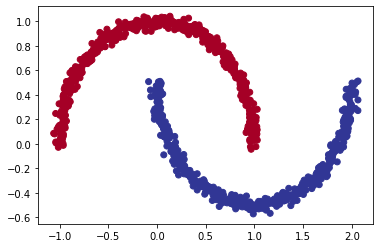

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X), len(y)

(1000, 1000)

In [12]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.4745 - accuracy: 0.7270
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.7890
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2691 - accuracy: 0.8460
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2407 - accuracy: 0.8600
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.8790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.8850
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.8860
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2267 - accuracy: 0.8860
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.8870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2250 - accuracy: 0.8860
Epoch 11/

In [13]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


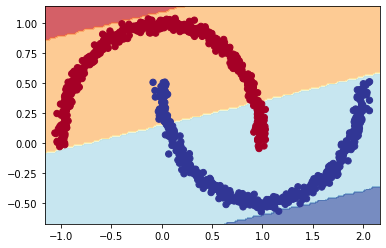

In [14]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, x, y)

In [15]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(x, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.2421 - accuracy: 0.6900
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8638 - accuracy: 0.7170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7913 - accuracy: 0.7230
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7879 - accuracy: 0.7230
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7863 - accuracy: 0.7230
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7850 - accuracy: 0.7230
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7837 - accuracy: 0.7230
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7825 - accuracy: 0.7230
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7813 - accuracy: 0.7230
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7801 - accuracy: 0.7230
Epoch 11/

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=tf.keras.activations.relu), # add 100 dense neurons
  tf.keras.layers.Dense(10,activation=tf.keras.activations.relu), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.6630 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7242 - accuracy: 0.5270
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.7570
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.8000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.8540
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.8760
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1644 - accuracy: 0.9060
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9330
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9470
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9530
Epoch 11/

In [22]:
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

doing binary classifcation...


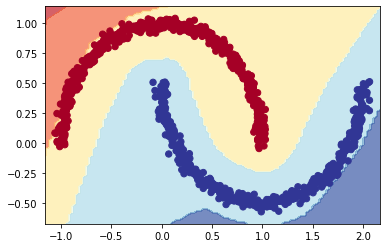

In [18]:
plot_decision_boundary(model_3, x, y)

In [23]:
# Split data into train and test sets
x_train, y_train = x[:800], y[:800] # 80% of the data for the training set
x_test, y_test = x[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
x_train.shape, x_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [30]:
# Set random seed
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(x_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 1.9137 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.9244 - accuracy: 0.4988
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7198 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7125
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8037
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8087
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.8388
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.2175 - accuracy: 0.8612
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1937 - accuracy: 0.8800
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.8950
Epoch 11/

In [31]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(x_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 3.9798e-04 - accuracy: 1.0000
Model loss on the test set: 0.0003979843168053776
Model accuracy on the test set: 100.00%


doing binary classifcation...
doing binary classifcation...


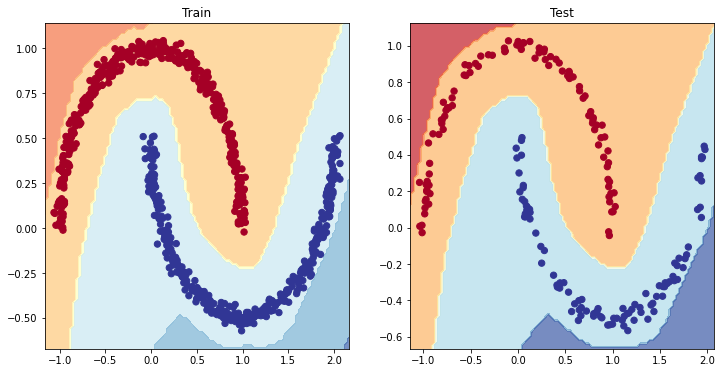

In [32]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=x_test, y=y_test)
plt.show()

In [33]:
pd.DataFrame(history.history)

,loss,accuracy
0,1.913673,0.49875
1,0.924364,0.49875
2,0.719847,0.50000
3,0.556935,0.71250
4,0.417991,0.80375
...,...,...
95,0.000047,1.00000
96,0.000061,1.00000
97,0.000069,1.00000
98,0.000043,1.00000


Text(0.5, 1.0, 'Model_8 training curves')

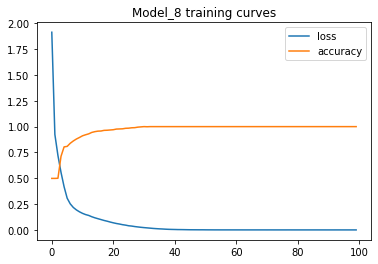

In [34]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [35]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(x_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 4.7568 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 3.6760 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 2.5635 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.5893 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1.4310 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3247 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.2224 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1135 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

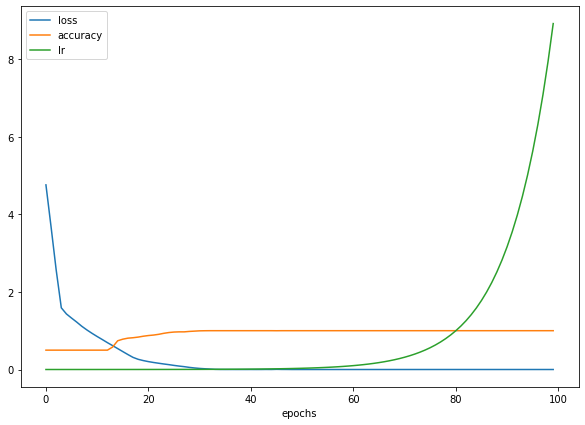

In [36]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

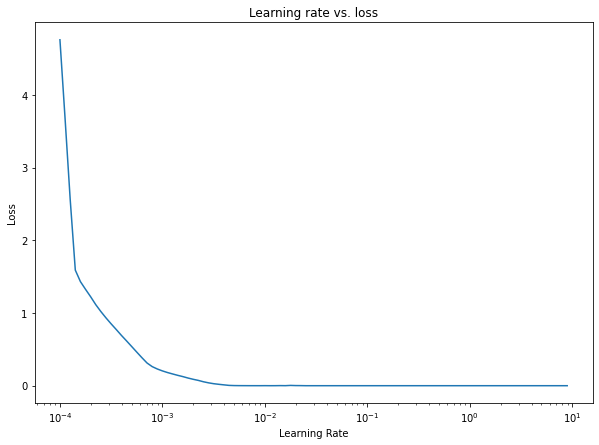

In [37]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [39]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(1)
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(x_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 3ms/step - loss: 0.3667 - accuracy: 0.8425
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8400
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1901 - accuracy: 0.9250
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.1051 - accuracy: 0.9525
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9825
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9975
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 5.1006e-04 - accuracy: 1.0000
Epoch 11/20
25/25 [=======

In [40]:
model_10.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 5.6568e-04 - accuracy: 1.0000


[0.0005656845751218498, 1.0]

doing binary classifcation...
doing binary classifcation...


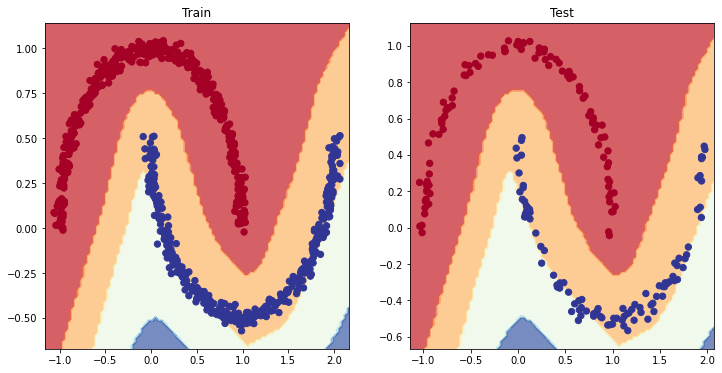

In [42]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=x_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=x_test, y=y_test)
plt.show()

In [43]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(x_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

ValueError: ignored

In [44]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 1.],
       [ 1.],
       [ 2.],
       [ 1.],
       [-0.],
       [-0.],
       [ 2.],
       [-0.],
       [ 1.],
       [-0.]], dtype=float32)>

In [45]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[101,   0,   0],
       [  0,  87,  12],
       [  0,   0,   0]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


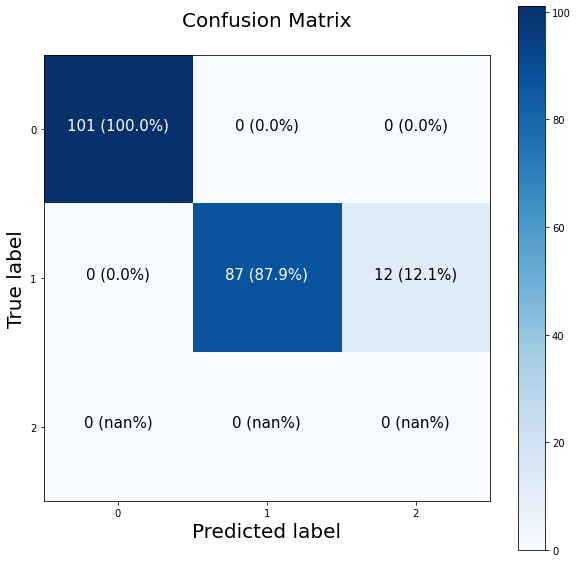

In [46]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [47]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


###Fashion MNIST

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [50]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

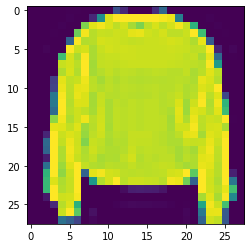

In [51]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [52]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

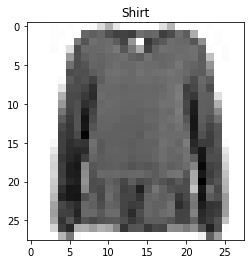

In [54]:
# Plot an example image and its label
plt.imshow(train_data[18], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[18]]);

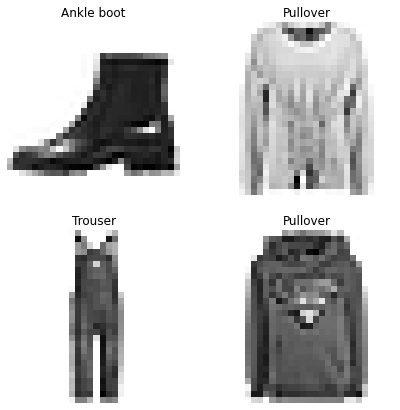

In [56]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [57]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [58]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [59]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [60]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

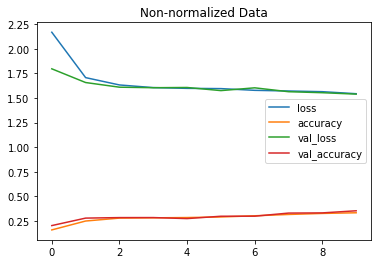

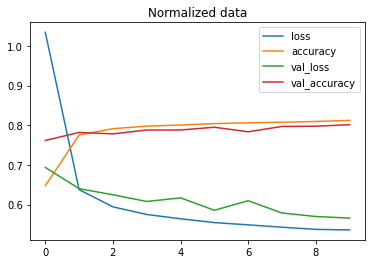

In [61]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [62]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

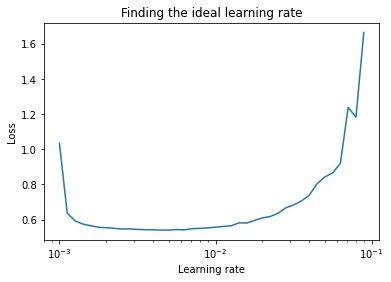

In [63]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [85]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.5120 - accuracy: 0.8183 - val_loss: 0.4206 - val_accuracy: 0.8456
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3749 - accuracy: 0.8631 - val_loss: 0.4224 - val_accuracy: 0.8470
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3401 - accuracy: 0.8748 - val_loss: 0.4128 - val_accuracy: 0.8428
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3163 - accuracy: 0.8842 - val_loss: 0.3846 - val_accuracy: 0.8645
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3001 - accuracy: 0.8874 - val_loss: 0.3569 - val_accuracy: 0.8711
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2872 - accuracy: 0.8914 - val_loss: 0.3722 - val_accuracy: 0.8603
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.8959 - val_loss: 0.3615 - val_accuracy: 0.8726
Epo

In [65]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [86]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[9.3131813e-09, 6.4421783e-08, 1.1357083e-10, 5.1223037e-10,
        1.1228697e-12, 2.2188708e-04, 3.1242575e-10, 2.7077461e-03,
        3.6072934e-09, 9.9707031e-01],
       [3.6374073e-05, 2.2922120e-16, 9.9932551e-01, 2.9408000e-09,
        6.3569442e-04, 3.6937976e-25, 2.4180410e-06, 2.5864621e-23,
        4.9380014e-11, 2.1410086e-22],
       [7.6656480e-11, 1.0000000e+00, 1.8749418e-16, 1.5528769e-11,
        1.1570157e-14, 1.4930028e-26, 1.5178452e-11, 4.2083190e-26,
        6.1733902e-14, 1.4069895e-25],
       [2.4786524e-11, 1.0000000e+00, 1.2988717e-18, 2.0921380e-10,
        6.8069579e-16, 9.6407153e-22, 1.6853548e-12, 4.4366495e-21,
        1.8640601e-15, 5.1060092e-20],
       [4.7625667e-01, 2.2319725e-10, 1.8726241e-04, 6.4932842e-06,
        3.8334187e-05, 6.2463538e-13, 5.2351075e-01, 1.8008149e-12,
        4.0301856e-07, 5.6408350e-11]], dtype=float32)

In [87]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [88]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [89]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[853,   4,  13,  23,   3,   1,  98,   0,   5,   0],
       [  3, 972,   1,  18,   4,   0,   2,   0,   0,   0],
       [ 13,   0, 805,  14, 119,   0,  48,   0,   1,   0],
       [ 14,  11,   7, 900,  46,   0,  20,   0,   2,   0],
       [  1,   0,  68,  23, 876,   0,  30,   0,   2,   0],
       [  0,   0,   0,   1,   0, 963,   0,  23,   0,  13],
       [107,   2,  83,  43, 104,   0, 653,   0,   8,   0],
       [  0,   0,   0,   0,   0,  12,   0, 972,   0,  16],
       [  4,   1,   3,   2,   3,   1,   8,   2, 976,   0],
       [  0,   0,   0,   1,   0,   5,   1,  64,   0, 929]])

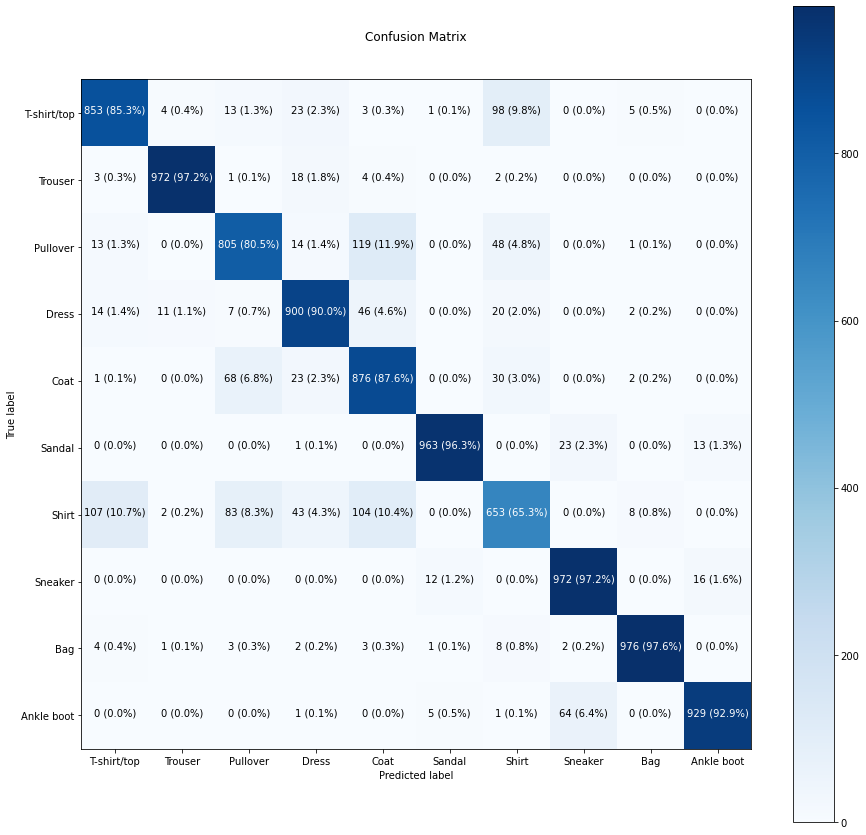

In [90]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [71]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

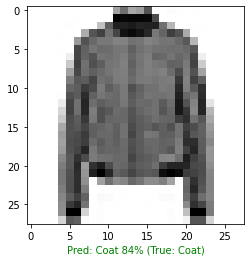

In [78]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [79]:
model_14.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_53 (Dense)            (None, 4)                 3140      
                                                                 
 dense_54 (Dense)            (None, 4)                 20        
                                                                 
 dense_55 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


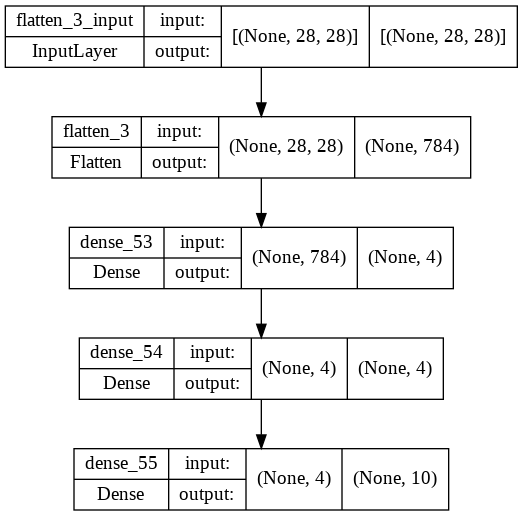

In [80]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)